# Random Forest Fraud

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

<AxesSubplot:>

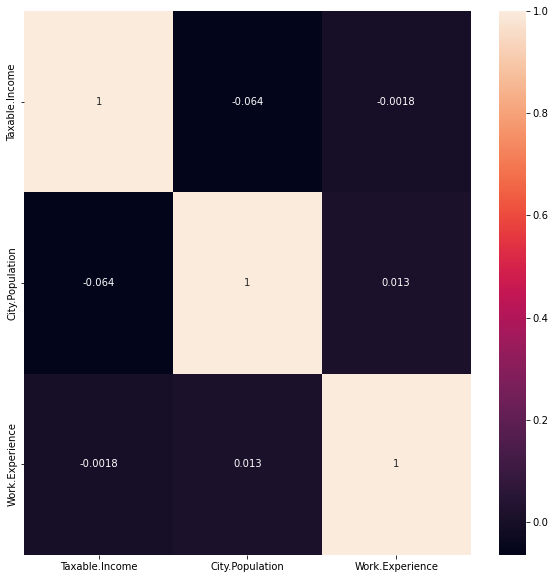

In [6]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

#  Random Forest Model

In [8]:
data = df.copy()

## Creating a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [9]:
data['Taxable.Income']=pd.cut(data['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [32]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES
596,YES,Divorced,good,55369,2,YES
597,NO,Divorced,good,154058,0,YES
598,YES,Married,good,180083,17,NO


C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

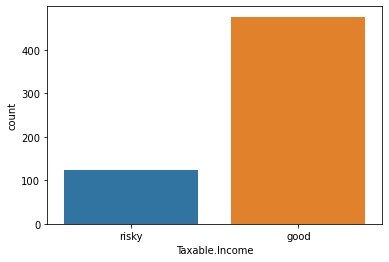

In [24]:
sns.countplot(data['Taxable.Income'])

In [11]:
list(data.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [33]:
X = data.drop('Taxable.Income', axis = 1)
y = data['Taxable.Income']


In [34]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


## Label Encoding

In [23]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
# Label Encoding
X['Undergrad']= label_encoder.fit_transform(X['Undergrad'])                     # YES = 1  No =0
X['Marital.Status']= label_encoder.fit_transform(X['Marital.Status'])          # Marrid = 1  Divorced =0 Single =2
X['Urban']= label_encoder.fit_transform(X['Urban'])                            # YES = 1  No =0

In [37]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

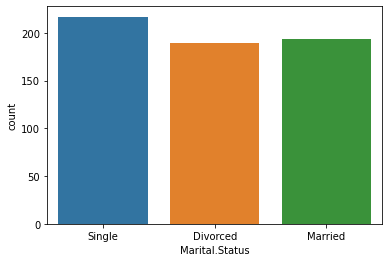

In [38]:
sns.countplot(data['Marital.Status'])

In [39]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [40]:
kfold = KFold(10)
accuracy = []
for i in range(1,150):
    forest = RandomForestClassifier(n_estimators = i)
    results = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(results))
accuracy

[0.6716666666666666,
 0.73,
 0.6783333333333333,
 0.73,
 0.725,
 0.74,
 0.7066666666666667,
 0.745,
 0.7133333333333334,
 0.7499999999999999,
 0.7300000000000001,
 0.7566666666666666,
 0.725,
 0.745,
 0.7433333333333334,
 0.7416666666666667,
 0.7383333333333333,
 0.7533333333333333,
 0.7166666666666666,
 0.7566666666666666,
 0.7316666666666667,
 0.7449999999999999,
 0.7333333333333333,
 0.74,
 0.73,
 0.7483333333333333,
 0.7316666666666667,
 0.7466666666666666,
 0.7366666666666666,
 0.735,
 0.73,
 0.7499999999999999,
 0.7316666666666667,
 0.7466666666666666,
 0.7249999999999999,
 0.74,
 0.7433333333333334,
 0.7516666666666667,
 0.74,
 0.7416666666666667,
 0.74,
 0.7383333333333333,
 0.7416666666666666,
 0.7433333333333334,
 0.7416666666666666,
 0.7383333333333333,
 0.7516666666666666,
 0.74,
 0.7266666666666667,
 0.74,
 0.7383333333333333,
 0.7466666666666667,
 0.735,
 0.7483333333333333,
 0.735,
 0.7449999999999999,
 0.7299999999999999,
 0.74,
 0.7316666666666667,
 0.7416666666666666,

In [41]:
n_est_ideal = accuracy.index(max(accuracy[2:]))
n_est_ideal

11

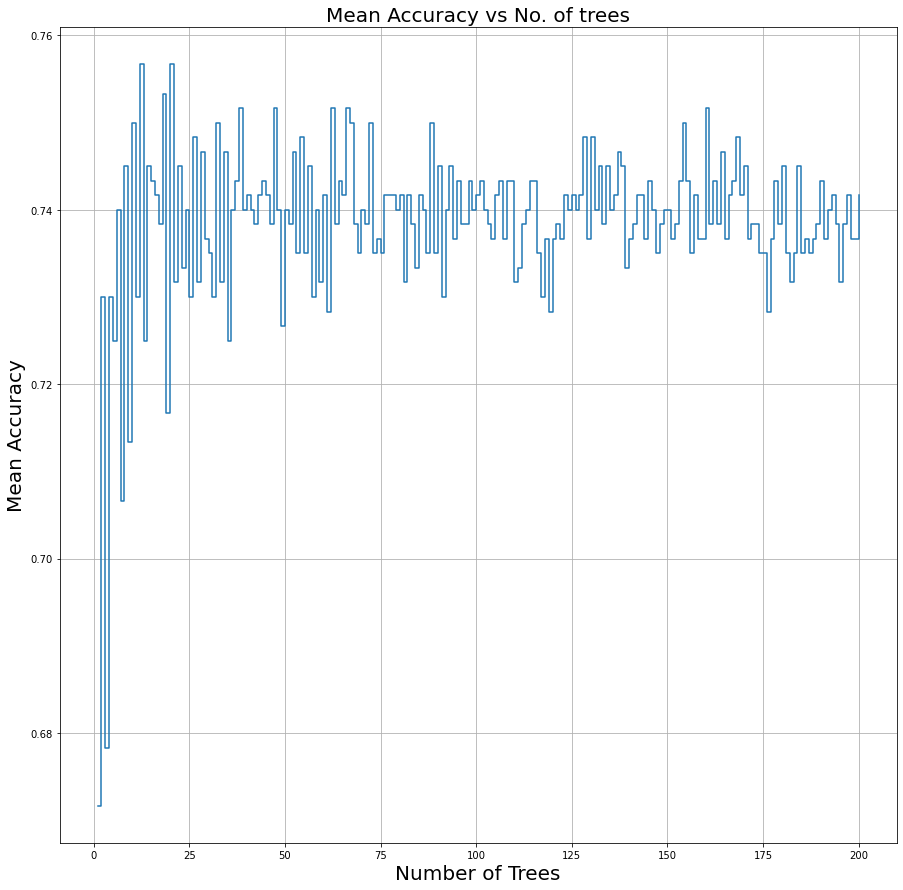

In [42]:
plt.figure(figsize = (15,15))
plt.plot(range(1,150), accuracy, drawstyle = 'steps-post')
plt.xlabel('Number of Trees', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Mean Accuracy vs No. of trees', fontsize = 20)
plt.grid()

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [44]:
y_train.value_counts()

good     382
risky     98
Name: Taxable.Income, dtype: int64

In [46]:
model =RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7520833333333333

In [47]:
pred_train = model.predict(x_train)

In [49]:
confusion_matrix(y_train,pred_train)

array([[382,   0],
       [  0,  98]], dtype=int64)

In [50]:
pred_test = model.predict(x_test)


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.7083333333333334

In [53]:
confusion_matrix(y_test,pred_test)

array([[85,  9],
       [26,  0]], dtype=int64)

In [54]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [56]:
df_t

,Actual,Predicted
504,good,risky
224,good,good
375,good,good
535,good,good
348,good,good
...,...,...
233,risky,good
158,risky,good
108,good,good
367,risky,good


In [57]:
model.feature_importances_

array([0.03861072, 0.06539595, 0.52584208, 0.33228654, 0.0378647 ])

In [58]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [59]:
fi

,feature,importance
2,City.Population,0.525842
3,Work.Experience,0.332287
1,Marital.Status,0.065396
0,Undergrad,0.038611
4,Urban,0.037865


# City population is most important feature

In [67]:
model.predict(x_test)

array(['risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'risky', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'risky', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good